In [1]:
import cv2
from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import json

In [2]:

detection_bbox_file="COCO_val2017_detections_AP_H_56_person.json"
with open(detection_bbox_file,'r') as bbox_file:
    annot=json.loads(bbox_file.readline())

In [3]:
print(annot[0])
img_id=annot[0]['image_id']
print("img_id:",str(img_id))

{'category_id': 1, 'score': 0.9992738366127014, 'image_id': 532481, 'bbox': [249.8199079291458, 175.21093805640606, 74.00419360691592, 55.626325589288854]}
img_id: 532481


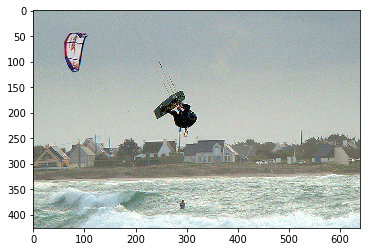

In [4]:
img_cv=cv2.imread(str(img_id).zfill(12)+'.jpg')
img=Image.open(str(img_id).zfill(12)+'.jpg')

plt.imshow(img)

plt.show()

In [5]:
pos=annot[0]['bbox']
print(pos)

[249.8199079291458, 175.21093805640606, 74.00419360691592, 55.626325589288854]


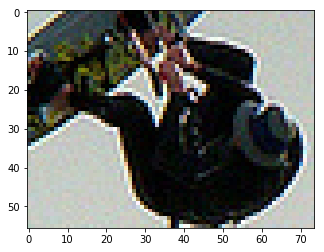

In [6]:
a,b=max(0,pos[0]),max(0,pos[1])
c,d=min(img.size[1],pos[0]+pos[2]),min(img.size[0],pos[1]+pos[3])
## crop(PIL.Image,y,x,h,w) ！! note the order
img=transforms.functional.crop(img,pos[1],pos[0],pos[3],pos[2])  
                              
#cv2.rectangle(img_cv, (int(a),int(b)), (int(c),int(d)), (226,43,138), 2)

#img=Image.fromarray(cv2.cvtColor(img_cv,cv2.COLOR_BGR2RGB))
#img.save(str(img_id)+'_x.jpg')
plt.imshow(img)
plt.show()